# Predicting Google Stock Using Terrorism News

Machine learning is a big topic and it can seem intimidating for newcomers to data science. I suggest that it's not that hard to pick up the essentials. If you're getting started on your analytics journey or even if you've done it for a while but find it hard to wrap your head around machine learning concepts, this tutorial is for you.  We're going to attempt to predict Google stock prices using terrorism news. 

Given today's Google stock price information and the number of news articles and social media posts that mention "terror", we want to predict whether Google stock will open higher or lower the next day.

> ### Does terrorism news affect Google stock (GOOG) prices?

You may have even wondered yourself whether terrorism news affect the stock market. Analytics project is all about asking some questions that intrigue you and then exploring how you might solve your questions using data. 

We're going to look at Google (now Alphabet) historical stock prices to answer this question. But before we begin, what is your intuition? Does terrorism news affect Google stock (GOOG) price? Take a moment to think about it and make your guess. We'll see where we come out. 

Let's get started.

## 1. What you need

Python has some powerful tools that enable you to do machine learning on the fly. We're going to use Python 2.7 for this project (the eventregistry package we're going to use later is written in Python 2.7). You can get [a Python 2.7 distribution from Enthought Canopy](https://store.enthought.com/downloads/#default) already preloaded with a lot of the tools we're going to use. 

We're also going to install some additional packages as we go through the tutorial.

## 2. Introduction to the data

We'll be using GOOG dataset from Yahoo! Finance. We'll also use data from [EventRegistry.org](http://eventregistry.org/). EventRegistry collects and processes news articles and social media data from around the world allowing you to search for articles and events. It also allows you to get trends and do sentiment analysis. 


### GOOG dataset

In [1]:
# Import modules we need to read in GOOG dataset
import csv
import urllib2
import pandas as pd

# We'll look at data from the beginning of 2016
url = 'http://real-chart.finance.yahoo.com/table.csv?s=GOOG&a=00&b=5&c=2016&d=05&e=29&f=2016&g=d&ignore=.csv'
response = urllib2.urlopen(url)
goog_df = pd.read_csv(response)

Here's what the data looks like.

In [2]:
goog_df.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-06-29,683.000000,687.429016,681.409973,684.109985,1928500,684.109985
1,2016-06-28,678.969971,680.330017,673.000000,680.039978,2116600,680.039978
2,2016-06-27,671.000000,672.299988,663.283997,668.260010,2629000,668.260010
3,2016-06-24,675.169983,689.400024,673.450012,675.219971,4399800,675.219971
4,2016-06-23,697.450012,701.950012,687.000000,701.869995,2157400,701.869995


Let's process the data to get it in the correct format for the machine learning algorithms we'll use later.

`pandas` and `numpy` are commonly used Python packages to process and analyze data. Let's import `pandas` now and use it to process the data.

In [3]:
# It's common to get a lot of warnings when slicing pandas datasets
# We'll turn off the warnings for this tutorial 
pd.options.mode.chained_assignment = None

# Create a column, Next_Day, with the next day's opening price
next_day = goog_df["Open"].iloc[1:]
goog = goog_df.iloc[:-1,:]
goog["Next_Day"] = next_day.values
len(goog)

122

As you can see, we've 122 days worth of historical prices. Let's visualize the data.

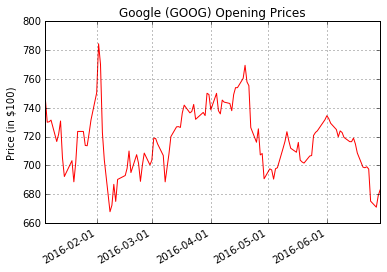

In [4]:
# Import modules we need to plot the data
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates

# Plot the data
days = list(goog_df['Date'])
opening = list(goog_df['Open'])
days = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in days]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(days,opening, color="r")
plt.gcf().autofmt_xdate()

# Label the plot
plt.title("Google (GOOG) Opening Prices")
plt.ylabel("Price (in $100)")
plt.grid(True)
plt.show()

As you might expect, the stock goes up and down a lot. If stock prices were easy to predict, it won't be such a hot topic. Now, though, we can add out own voice to the debate.

### Terrorism dataset


Next, we'll get terrorism data from EventRegistry (ER). Essentially, we're using an application programming interface (API) provided by ER to get the `count` of new articles that contain terrorism news. We'll call this dataset `newsScore`. We'll also do the same thing for social media posts and call it `socialScore`.

I'm providing 2 options to pull this data.

Just uncomment the code for the option you prefer and run the code. 

#### Option 1

You can pull the data directly from ER website using below code but you need to sign up at [eventregistry.org](http://eventregistry.org/register?redirectUrl=/searchEvents) and enter your username and password in the code. The username and password should be in quotes, e.g. `'myname@gmail.com'` and `'mypassword'`. Sign up is free! You can read more about using eventregistry API [here](https://github.com/gregorleban/EventRegistry/wiki). 

I'll warn you that pulling the data directly will take a fews minutes. Don't worry if you get a lot of printouts on your screen, saying: Event Registry host: http://eventregistry.org.

Option 1 code is immediately below. 


In [5]:
#!pip install eventregistry
# from eventregistry import *

# def getScore(day, category, concept):
#     er = EventRegistry()
#     #er.login('username', 'password')
#     q = GetCounts(er.getConceptUri(concept), 
#                    source = category,
#                    startDate = day, 
#                    endDate = day)
#     return er.execQuery(q).values()[0][0]["count"]

# dates = []

# newsScore = []
# counter = 0
# for index, row in goog.iterrows():
#     dates.append(row[0])
#     newsScore.append(getScore(row[0], "news", "terror"))
   
   
# socialScore = []
# for index, row in goog.iterrows():
#     socialScore.append(getScore(row[0], "social", "terror"))

# terrorScores = pd.DataFrame({"Date" : dates, 
#                              'newsScore' : newsScore,
#                              'socialScore' : socialScore})

# cPickle.dump(terrorScores, open('terrorScores', 'wb')) #You can save and later reuse the data

#### Option 2

You can use the dataset I already downloaded which is located [here](https://github.com/sedeh/resources). Specifically, download `terrorScores` and save it in the same folder where this jupyter notebook (.ipynb) file is located. Option 2 code is immediately below.


In [6]:
#import cPickle
#terrorScores = cPickle.load(open('terrorScores', 'rb'))

`socialScore` and `newsScore` look like this.

In [7]:
terrorScores.head(5)

,Date,newsScore,socialScore
0,2016-06-29,10100,238728
1,2016-06-28,5731,174572
2,2016-06-27,3256,103334
3,2016-06-24,2768,91819
4,2016-06-23,4414,94415


Similar to `GOOG` dataset, we can visualize `newsScore` and `socialScore`.

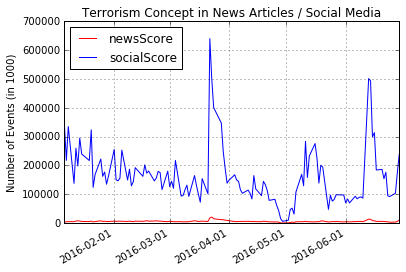

In [8]:
# Load data from terrorScore dataset
dates = terrorScores["Date"]
socialScore = terrorScores["socialScore"]
newsScore = terrorScores["newsScore"]

# Plot the data
dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(dates,newsScore, color="r", label='newsScore')
plt.plot(dates,socialScore, color="b", label='socialScore')
plt.gcf().autofmt_xdate()

# Label the plot
plt.title("Terrorism Concept in News Articles / Social Media")
plt.ylabel("Number of Events (in 1000)")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

There seems to be a lot more terrorism mentions on social media than in news articles. 

Now that we've both datasets, `GOOG` and `terrorism` datasets, we can combine them into one dataset, `goog_X`. 

In [9]:
goog_X = pd.merge(goog, terrorScores, how='inner', on=['Date'])

Here's what the dataset looks like.

In [10]:
goog_X.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close,Next_Day,newsScore,socialScore
0,2016-06-29,683.000000,687.429016,681.409973,684.109985,1928500,684.109985,678.969971,10100,238728
1,2016-06-28,678.969971,680.330017,673.000000,680.039978,2116600,680.039978,671.000000,5731,174572
2,2016-06-27,671.000000,672.299988,663.283997,668.260010,2629000,668.260010,675.169983,3256,103334
3,2016-06-24,675.169983,689.400024,673.450012,675.219971,4399800,675.219971,697.450012,2768,91819
4,2016-06-23,697.450012,701.950012,687.000000,701.869995,2157400,701.869995,699.059998,4414,94415


Let's see if we've any missing values.

In [11]:
goog_X.loc[(goog_X['Open'].isnull()) |
              (goog_X['High'].isnull()) |
              (goog_X['Low'].isnull()) |
              (goog_X['Close'].isnull()) |
              (goog_X['Volume'].isnull()) |
              (goog_X['Adj Close'].isnull()) |
              (goog_X['Next_Day'].isnull()) |
              (goog_X['newsScore'].isnull())|
              (goog_X['socialScore'].isnull())]

,Date,Open,High,Low,Close,Volume,Adj Close,Next_Day,newsScore,socialScore


Great, we don't have any rows with missing values!

## 3. Label the data

We're ready to label our data. Each row in the dataset is called an `observation`. The columns contain `features` which relate to GOOG stock in some way. The `features` are also known as `predictors`. Each `observation` will get a `label` as follows. If the stock opens higher the next day, we'll label it as 1. Otherwise, we'll label it as 0.  

In [12]:
# Create labels
nextDayOpen = []

for index, row in goog.iterrows():
    if row['Next_Day'] > row['Open']:
        nextDayOpen.append(1)
    else:
        nextDayOpen.append(0)
        
import numpy as np
goog_y = np.asarray(nextDayOpen)

## 4. Split the data into training and testing sets

A good practice in machine learning is to split your dataset into 

- a training set -- which we use to train the classifer,

- a test set -- which we use to evaluate the classifier's performance.

This is called `cross-validation`. It helps to avoid `overfitting` which happens when your model sort of just "crams" the pattern in your data. It does not learn anything and it performs poorly when it sees new data. A good rule of thumb is to train the model on **70%** of your data or more and test it on the rest. This is key concept to remember in your data science journey.

Another good practice is to randomize your data before splitting. 

> ### Train the classifier on 70% of your data or more and test it on the rest
> *Do randomize your data before splitting*

First, let's remove `Date` column because there's no good way to use it in our classifier. We should also remove `Next_Day` column. Otherwise, we would be giving the model the information it's trying to predict. Of course, it will perform perfectly in that scenario!

In [13]:
goog_X.drop('Date', inplace=True, axis=1)
goog_X.drop('Next_Day', inplace=True, axis=1)

We added `labels` to our data earlier. As the name implies, let's now use the `predictors` to try to predict the `labels`. In other words, given an `observation` (opening price, closing price, volume sold, adjusted price, newsScore, socialScore, etc.), will the stock open higher or lower the next day?

With the preambles out of the way, let's **randomize** and then **split** the data. We're in luck because there's a Python package for that!

The package is part of `sklearn`, Python's powerful machine learning library. If you don't already have it installed, uncomment the first line of code below and execute it with the rest of the code.

In [14]:
#!pip install sklearn 
from sklearn.cross_validation import train_test_split

# Convert pandas data frame to numpy matrix array (format required for sklearn algorithms)
goog_X = goog_X.as_matrix()

# Split the data
(goog_X_train,
 goog_X_test,
 goog_y_train,
 goog_y_test) = train_test_split(goog_X, goog_y, train_size=0.8, random_state=1)

## 5. Logistic Regression

As you can see from above, usually, most of your time ([some estimate 70% or more](https://twitter.com/bigdataborat/status/306596352991830016)) is spent on getting and preparing your data. So get used to the ["janitor work"](http://www.nytimes.com/2014/08/18/technology/for-big-data-scientists-hurdle-to-insights-is-janitor-work.html?_r=0), it's good for your data science muscles!

A simple yet powerful machine learning algorithm is logistic regression. It's sort of the linear equation you learned in high school, $y = mx + b$. You feed your input, $x$, into the linear function and it spits out an output, $y$. 

Instead of a linear function, logistic regression uses a sigmoid function to give a binary output, 1 or 0. In reality, it produces a probability. As you also remember from your high school math, probability is between 0 and 1. In logistic regression, the default threshold is set at 0.5. This means that if the probability is less than 0.5, well, the model outputs 0. If equal or greater than 0.5, it outputs 1. 

Easy enough. If you are still curious, here's what the sigmoid function looks like.

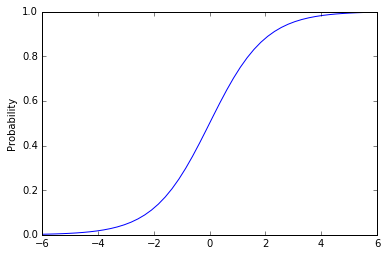

In [15]:
# Logit Function
def logit(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828
    return np.exp(x)  / (1 + np.exp(x)) 
    
# Generate 50 real values, evenly spaced, between -6 and 6.
x = np.linspace(-6,6,50, dtype=float)

# Transform each number in t using the logit function.
y = logit(x)

# Plot the resulting data.
plt.plot(x, y)
plt.ylabel("Probability")
plt.show()

Now, let's build our model.

First, we `fit` the model with our training dataset containing `predictors` and `labels`. Essentially, we're coaching the model: if I give you this set of `predictors`, you should predict this `label` and so on. 


In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(goog_X_train, goog_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now that the model is `"trained"`, we can use it to make predictions. We pass in the test `predictors` and evaluate how well the model does at predicting the corresponding test `labels`.

In [17]:
predicted_labels = model.predict(goog_X_test)


Here' a side by side display of the predicted labels and the actual labels.

In [18]:
labels = pd.DataFrame({"actual_label" : goog_y_test, 
                        "predicted_label" : predicted_labels})
labels

,actual_label,predicted_label
0,1,0
1,1,1
2,1,0
3,0,1
4,0,0
5,1,1
6,1,0
7,1,0
8,0,0
9,0,0


Let's compute some evaluation metrics to assess the model. There's a great variety of [model evaluation metrics](http://scikit-learn.org/stable/modules/model_evaluation.html) used to assess the performance of a model. We're going to focus on 3 of the commonly used metrics: `accuracy`, `sensitivity` and `specificity`.

## 6. Accuracy

In a nutshell, `accuracy` tells you what fraction of the predictons were correct.

$Accuracy = \frac{Number~of~Correctly~Predicted}{Number~of~Observations}$

In [19]:
# The import statement is to enable floating point division
from __future__ import division 

matches = labels['predicted_label'] == labels['actual_label']
correct_predictions = matches[matches==True]
accuracy = len(correct_predictions) / len(matches)
print 'Accuracy: {}'.format(accuracy)

Accuracy: 0.48


The `accuracy` of the model is worse than random quess. 

## 7. Sensitivity

`Sensitivity` or `True Positive Rate` tells us how effective the model is at predicting positive outcomes. If sensitivity is low, it means that the model isn't effective at predicting positive cases. In our case, positive case is that GOOG will open higher the next day.

$Sensitivity = \frac{True~Positives}{True~Positives~+~False~Negatives}$

In [20]:
true_positive_filter = (labels['predicted_label'] == 1) & (labels['actual_label'] == 1)
true_positives = len(labels['actual_label'][true_positive_filter])
false_negative_filter = (labels['predicted_label'] == 0) & (labels['actual_label'] == 1)
false_negatives = len(labels['actual_label'][false_negative_filter])
sensitivity = true_positives / (true_positives + false_negatives)
print 'Sensitivity: {}'.format(sensitivity)

Sensitivity: 0.4375


Likewise, the `sensitivity` of the model is less than **50%**. 

## 8. Specificity

`Specificity` or `True Negative Rate` tells us how effective the model is at predicting negative outcomes. 

$Specificity = \frac{True~Negatives}{False~Positives~+~True~Negatives}$

In [21]:
true_negative_filter = (labels['predicted_label'] == 0) & (labels['actual_label'] == 0)
true_negatives = len(labels['actual_label'][true_negative_filter])
false_positive_filter = (labels['predicted_label'] == 1) & (labels['actual_label'] == 0)
false_positives = len(labels['actual_label'][false_positive_filter])
specificity = true_negatives / (false_positives + true_negatives)
print 'Specificity: {}'.format(specificity)

Specificity: 0.555555555556


At about **56%**, the model's `specificity` seems a little bit better than **50%**. 

Let's quickly get a second opinion from another classifier, `support vector machine (SVM)`.

# 10. Support Vector Machine

In [22]:
from sklearn.svm import SVC

# This may take 1-3 minutes to run
model2 = SVC(C=1.0, kernel='poly', degree=1).fit(goog_X_train, goog_y_train)
predicted_labels2 = model2.predict(goog_X_test)

Here's a side by side display of the predicted labels and actual labels.

In [23]:
labels2 = pd.DataFrame({"actual_label" : goog_y_test, 
                        "predicted_label" : predicted_labels2})
labels2

,actual_label,predicted_label
0,1,1
1,1,1
2,1,0
3,0,1
4,0,1
5,1,0
6,1,1
7,1,0
8,0,1
9,0,0


Next, we compute the 3 evaluation metrics and see how `SVM` does. 

In [24]:
matches2 = predicted_labels2 == goog_y_test
correct_predictions2 = matches2[matches2==True]
accuracy2 = len(correct_predictions2) / len(matches2)
print 'Accuracy: {}'.format(accuracy2)

Accuracy: 0.52


In [25]:
true_positive_filter2 = (predicted_labels2 == 1) & (goog_y_test == 1)
true_positives2 = len(goog_y_test[true_positive_filter2])
false_negative_filter2 = (predicted_labels2 == 0) & (goog_y_test == 1)
false_negatives2 = len(goog_y_test[false_negative_filter2])
sensitivity2 = true_positives2 / (true_positives2 + false_negatives2)
print 'Sensitivity: {}'.format(sensitivity2)

Sensitivity: 0.625


In [26]:
true_negative_filter2 = (predicted_labels2 == 0) & (goog_y_test == 0)
true_negatives2 = len(goog_y_test[true_negative_filter2])
false_positive_filter2 = (predicted_labels2 == 1) & (goog_y_test == 0)
false_positives2 = len(goog_y_test[false_positive_filter2])
specificity2 = true_negatives2 / (false_positives2 + true_negatives2)
print 'Specificity: {}'.format(specificity2)

Specificity: 0.333333333333


You've seen this type of metrics before with the logistic regression model and you're likely more comfortable interpreting them. Notice that `sensitivity` is about **63%**. So, the model is about **63%** effective at predicting whether the stock will open higher the next day. 

Overall, it appears that terrorism news isn't a good predictor of GOOG stock prices. Does this match your intuition? 

For us right now, this just means we're demystifying machine learning and getting some practice with it. 

Key takeaways from this whole process:

- You should always get a second and even third or more opinions from other algorithms.

- You should also generate multiple performance metrics. How much weight you give each metric really depends on your priorities.


## 11. Next steps

This tutorial provides a workflow of how you might approach your machine learning project. Machine learning seems too complex looking at it from the outside. I recommend building an intuition for what's going on and then getting involved **right away**. There will be time to dive deeper into the internals but just a few basics can take you 80% of the way (so-called ["80/20 paradigm"](http://www.ibm.com/developerworks/library/os-weka1/)). 

Here's a question for you:

> ### How might you improve the models we just built?


A few ideas to get your thoughts flowing:


- Get more data. **Bigger is better**

- Use 10-fold cross validation

- Tune the default `parameters` in the classifiers

- Try weighted measures, something like:

$$terrorScores = \frac{Terrorism~events~in~news~or~social~media}{Total~news~or~social~media~count}$$

- Add other concepts, sentiment or trends

- Add information from the general U.S. stock markets and even international markets

- Try other algorithms such as decision tress or even an ensemble of algorithms


As you explore, if you find something interesting or something that perhaps challenged your intuition, I like to hear about it! 